In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df =  pd.read_csv('AusApparalSales4thQrt2020.csv')

In [9]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [13]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [17]:
df.shape

(7560, 6)

In [91]:
df.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [ ]:
#Inspect the data manually to identify missing or incorrect information using the functions isna() and notna()

In [21]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7555    False
7556    False
7557    False
7558    False
7559    False
Length: 7560, dtype: bool

In [25]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [37]:
df.dropna(inplace=True)

In [29]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


## observation

The given dataset has no null values.

# Data Wrangling

In [9]:
new_df = pd.DataFrame(df,columns=['Sales','Unit'])
new_df.head()

,Sales,Unit
0,20000,8
1,20000,8
2,10000,4
3,37500,15
4,7500,3


In [47]:
df['Sales']

0       20000
1       20000
2       10000
3       37500
4        7500
        ...  
7555    35000
7556    37500
7557    37500
7558    27500
7559    32500
Name: Sales, Length: 7560, dtype: int64

In [43]:
df['Sales'].unique()

array([ 20000,  10000,  37500,   7500,  25000,  27500,  32500,  12500,
        15000,  22500,  35000,  30000,  40000,  70000,  52500,  72500,
        55000,  80000, 122500,  90000,  85000,  65000,  77500,  67500,
       107500, 125000, 110000,  50000,  45000,  47500,  97500,  42500,
        57500, 100000,  75000,  17500,  82500, 105000, 115000, 120000,
        92500,  62500,  87500, 112500, 117500,  95000, 102500,  60000,
         5000, 127500, 157500, 155000, 130000, 140000, 147500, 160000,
       132500, 152500, 135000, 150000, 137500, 162500, 142500, 145000])

In [65]:
df['MM_sales']= (df['Sales']-df['Sales'].min())/(df['Sales'].max()- df['Sales'].min())   #Normalization of sales data

In [69]:
df['MM_sales']

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: MM_sales, Length: 7560, dtype: float64

In [11]:
new_df

,Sales,Unit
0,20000,8
1,20000,8
2,10000,4
3,37500,15
4,7500,3
...,...,...
7555,35000,14
7556,37500,15
7557,37500,15
7558,27500,11


In [13]:
for i in df.columns.values.tolist():
    print(df[i].value_counts())

Date
1-Oct-2020     84
8-Dec-2020     84
6-Dec-2020     84
5-Dec-2020     84
4-Dec-2020     84
               ..
29-Oct-2020    84
28-Oct-2020    84
27-Oct-2020    84
26-Oct-2020    84
30-Dec-2020    84
Name: count, Length: 90, dtype: int64
Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64
Unit
9     406
10    402
6     370
8     369
7     362
     ... 
53      9
61      9
54      9
60      7
58      5
Name: count, Length: 64, dtype: int64
Sales
22500     406
25000     402
15000     370
20000     369
17500     362
         ... 
132500      9
152500      9
135000      9
150000      7
145000      5
Name: count, Length: 64, dtype: int64


In [75]:
df.drop(columns='MM_sales')

,Date,Time,State,Group,Unit,Sales,MM-sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873
...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857


In [9]:
df.groupby(['State']).max()

,Date,Time,Group,Unit,Sales
State,,,,,
NSW,9-Oct-2020,Morning,Women,45,112500
NT,9-Oct-2020,Morning,Women,15,37500
QLD,9-Oct-2020,Morning,Women,25,62500
SA,9-Oct-2020,Morning,Women,35,87500
TAS,9-Oct-2020,Morning,Women,15,37500
VIC,9-Oct-2020,Morning,Women,65,162500
WA,9-Oct-2020,Morning,Women,15,37500


In [11]:
df.groupby(['State']).min()

,Date,Time,Group,Unit,Sales
State,,,,,
NSW,1-Dec-2020,Afternoon,Kids,12,30000
NT,1-Dec-2020,Afternoon,Kids,2,5000
QLD,1-Dec-2020,Afternoon,Kids,3,7500
SA,1-Dec-2020,Afternoon,Kids,10,25000
TAS,1-Dec-2020,Afternoon,Kids,2,5000
VIC,1-Dec-2020,Afternoon,Kids,20,50000
WA,1-Dec-2020,Afternoon,Kids,2,5000


observation
We grouped States on the basis of maximum and minimum sales.

# Data Analysis

In [ ]:
# descriptive statistical analysis on the data in the Sales and Unit columns. 
# Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [13]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [15]:
num_data =  df.select_dtypes(include =  'number')

In [19]:
num_data

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [21]:
num_data.mean()

Unit        18.005423
Sales    45013.558201
dtype: float64

In [23]:
num_data.median()

Unit        14.0
Sales    35000.0
dtype: float64

In [5]:
cat_data =  df.select_dtypes(exclude =  'number')

In [7]:
cat_data.columns

Index(['Date', 'Time', 'State', 'Group'], dtype='object')

In [9]:
cat_data.mode()

,Date,Time,State,Group
0,1-Dec-2020,Afternoon,NSW,Kids
1,1-Nov-2020,Evening,NT,Men
2,1-Oct-2020,Morning,QLD,Seniors
3,10-Dec-2020,NaN,SA,Women
4,10-Nov-2020,NaN,TAS,NaN
...,...,...,...,...
85,8-Nov-2020,NaN,NaN,NaN
86,8-Oct-2020,NaN,NaN,NaN
87,9-Dec-2020,NaN,NaN,NaN
88,9-Nov-2020,NaN,NaN,NaN


In [17]:
num_data.std()

Unit        12.901403
Sales    32253.506944
dtype: float64

In [19]:
num_data.mode()

,Unit,Sales
0,9,22500


In [27]:
df[['State','Group','Unit','Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
#Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [21]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [23]:
df.groupby(['Sales']).max()

,Date,Time,State,Group,Unit
Sales,,,,,
5000,9-Nov-2020,Morning,WA,Women,2
7500,9-Oct-2020,Morning,WA,Women,3
10000,9-Oct-2020,Morning,WA,Women,4
12500,9-Oct-2020,Morning,WA,Women,5
15000,9-Oct-2020,Morning,WA,Women,6
...,...,...,...,...,...
152500,7-Dec-2020,Morning,VIC,Women,61
155000,8-Dec-2020,Morning,VIC,Women,62
157500,8-Dec-2020,Morning,VIC,Women,63


In [29]:
df.groupby('Sales')['Group'].max()

Sales
5000       Women
7500       Women
10000      Women
12500      Women
15000      Women
           ...  
152500     Women
155000     Women
157500     Women
160000     Women
162500     Women
Name: Group, Length: 64, dtype: object

In [25]:
df.groupby(['Sales']).min()

,Date,Time,State,Group,Unit
Sales,,,,,
5000,1-Nov-2020,Afternoon,NT,Kids,2
7500,1-Nov-2020,Afternoon,NT,Kids,3
10000,1-Nov-2020,Afternoon,NT,Kids,4
12500,1-Nov-2020,Afternoon,NT,Kids,5
15000,1-Dec-2020,Afternoon,NT,Kids,6
...,...,...,...,...,...
152500,13-Dec-2020,Afternoon,VIC,Kids,61
155000,1-Dec-2020,Afternoon,VIC,Kids,62
157500,1-Dec-2020,Afternoon,VIC,Kids,63


In [31]:
df.groupby('Sales')['Group'].min()

Sales
5000       Kids
7500       Kids
10000      Kids
12500      Kids
15000      Kids
          ...  
152500     Kids
155000     Kids
157500     Kids
160000      Men
162500     Kids
Name: Group, Length: 64, dtype: object

In [125]:
grouped_sales = df.groupby(["Group", "State"])["Sales"].sum().reset_index()
print(grouped_sales)

       Group State     Sales
0       Kids   NSW  18587500
1       Kids    NT   5700000
2       Kids   QLD   8510000
3       Kids    SA  14515000
4       Kids   TAS   5775000
5       Kids   VIC  26360000
6       Kids    WA   5625000
7        Men   NSW  19022500
8        Men    NT   5762500
9        Men   QLD   8392500
10       Men    SA  14655000
11       Men   TAS   5757500
12       Men   VIC  26407500
13       Men    WA   5752500
14   Seniors   NSW  18187500
15   Seniors    NT   5465000
16   Seniors   QLD   8190000
17   Seniors    SA  14717500
18   Seniors   TAS   5650000
19   Seniors   VIC  26315000
20   Seniors    WA   5512500
21     Women   NSW  19172500
22     Women    NT   5652500
23     Women   QLD   8325000
24     Women    SA  14970000
25     Women   TAS   5577500
26     Women   VIC  26482500
27     Women    WA   5262500


In [ ]:
# Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

In [37]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,Evening,TAS,Men,15,37500


In [47]:
weekly_report = df.resample('W').max()

In [49]:
weekly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-04,Morning,WA,Women,50,125000
2020-10-11,Morning,WA,Women,50,125000
2020-10-18,Morning,WA,Women,50,125000
2020-10-25,Morning,WA,Women,50,125000
2020-11-01,Morning,WA,Women,50,125000
2020-11-08,Morning,WA,Women,45,112500
2020-11-15,Morning,WA,Women,45,112500
2020-11-22,Morning,WA,Women,45,112500
2020-11-29,Morning,WA,Women,45,112500


In [59]:
weekly_report = df.resample('W').min()

In [61]:
weekly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-04,Afternoon,NSW,Kids,3,7500
2020-10-11,Afternoon,NSW,Kids,3,7500
2020-10-18,Afternoon,NSW,Kids,3,7500
2020-10-25,Afternoon,NSW,Kids,3,7500
2020-11-01,Afternoon,NSW,Kids,2,5000
2020-11-08,Afternoon,NSW,Kids,2,5000
2020-11-15,Afternoon,NSW,Kids,2,5000
2020-11-22,Afternoon,NSW,Kids,2,5000
2020-11-29,Afternoon,NSW,Kids,2,5000


In [65]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,Evening,TAS,Men,15,37500


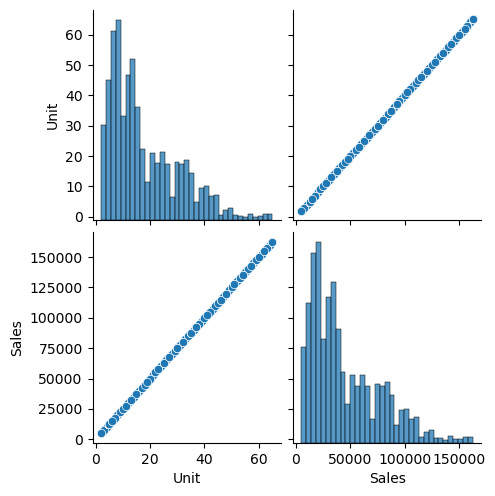

In [19]:
sns.pairplot(df)


In [73]:
monthly_report = df.resample('ME').max()

In [75]:
monthly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-31,Morning,WA,Women,50,125000
2020-11-30,Morning,WA,Women,45,112500
2020-12-31,Morning,WA,Women,65,162500


In [77]:
monthly_report = df.resample('ME').min()

In [79]:
monthly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-31,Afternoon,NSW,Kids,3,7500
2020-11-30,Afternoon,NSW,Kids,2,5000
2020-12-31,Afternoon,NSW,Kids,5,12500


In [83]:
quarterly_report = df.resample('QE').max()

In [85]:
quarterly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-12-31,Morning,WA,Women,65,162500


In [87]:
quarterly_report = df.resample('QE').min()

In [89]:
quarterly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-12-31,Afternoon,NSW,Kids,2,5000


# Data Visualization

In [ ]:
# State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

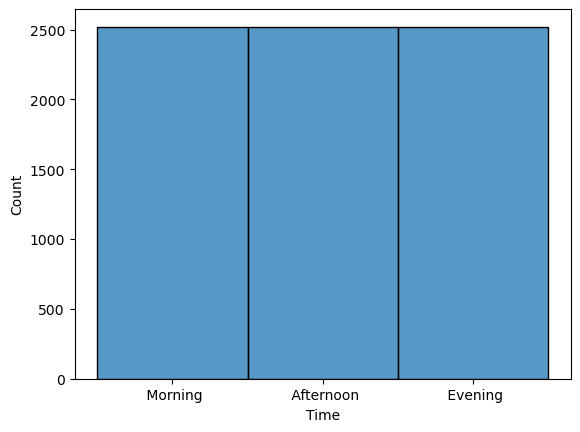

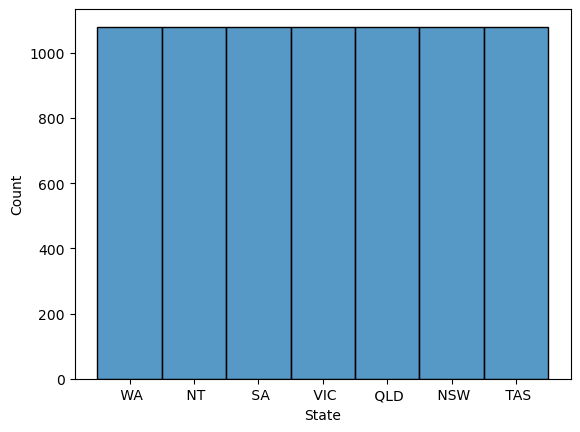

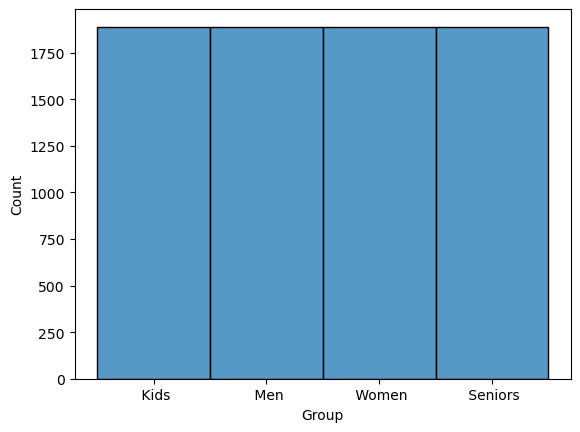

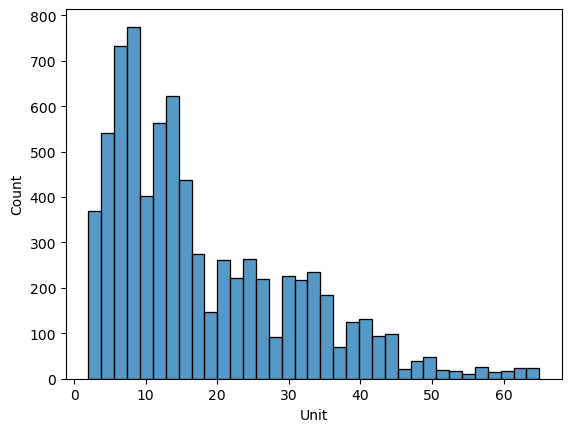

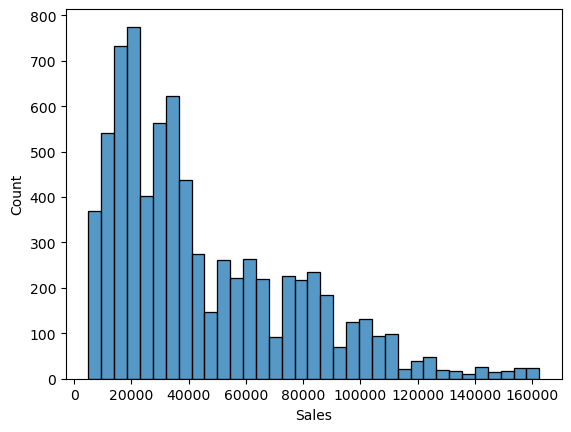

In [109]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

/var/folders/8g/42j1t13n79s9kywxmbgrdt3r0000gn/T/ipykernel_2187/180674826.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="State", y="Sales", hue="Group", ci=None)


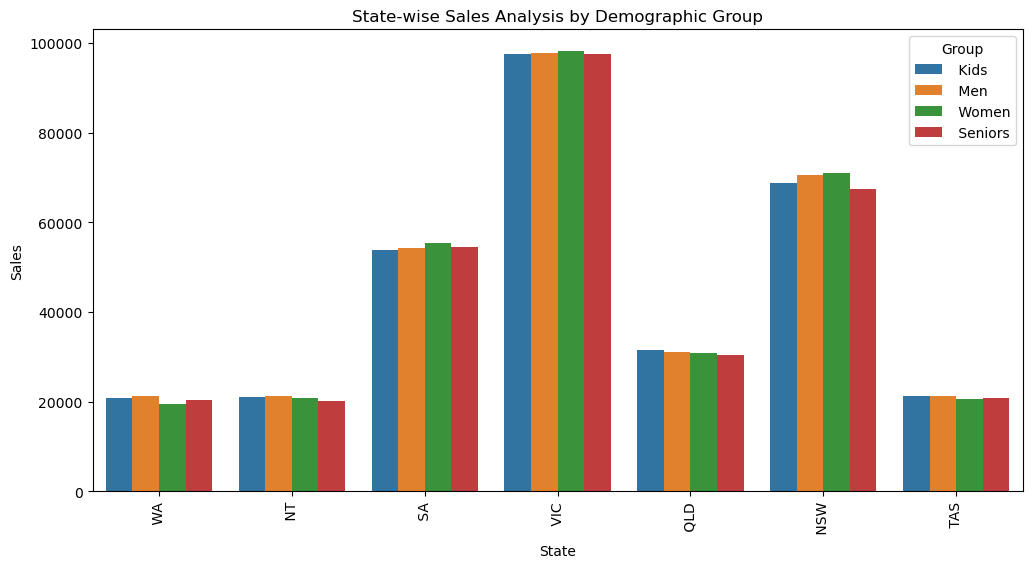

In [115]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="State", y="Sales", hue="Group", ci=None)
plt.xticks(rotation=90)
plt.title("State-wise Sales Analysis by Demographic Group")
plt.xlabel("State")
plt.ylabel("Sales")
plt.legend(title="Group")
plt.show()

/var/folders/8g/42j1t13n79s9kywxmbgrdt3r0000gn/T/ipykernel_2187/2785671437.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df, x="State", y="Sales", hue="Group", kind="bar", height=6, aspect=2, ci=None)


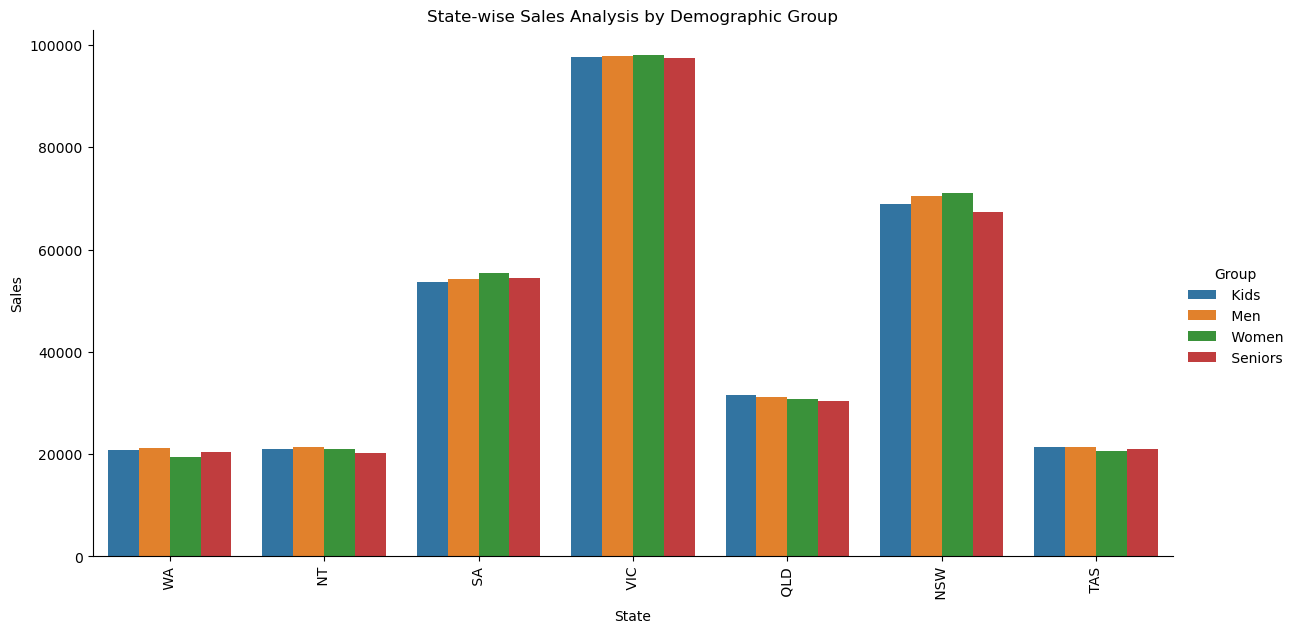

In [121]:
sns.catplot(data=df, x="State", y="Sales", hue="Group", kind="bar", height=6, aspect=2, ci=None)
plt.xticks(rotation=90)
plt.title("State-wise Sales Analysis by Demographic Group")
plt.show()

/var/folders/8g/42j1t13n79s9kywxmbgrdt3r0000gn/T/ipykernel_2187/4189000626.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Group", y="Sales", hue="State", ci=None)


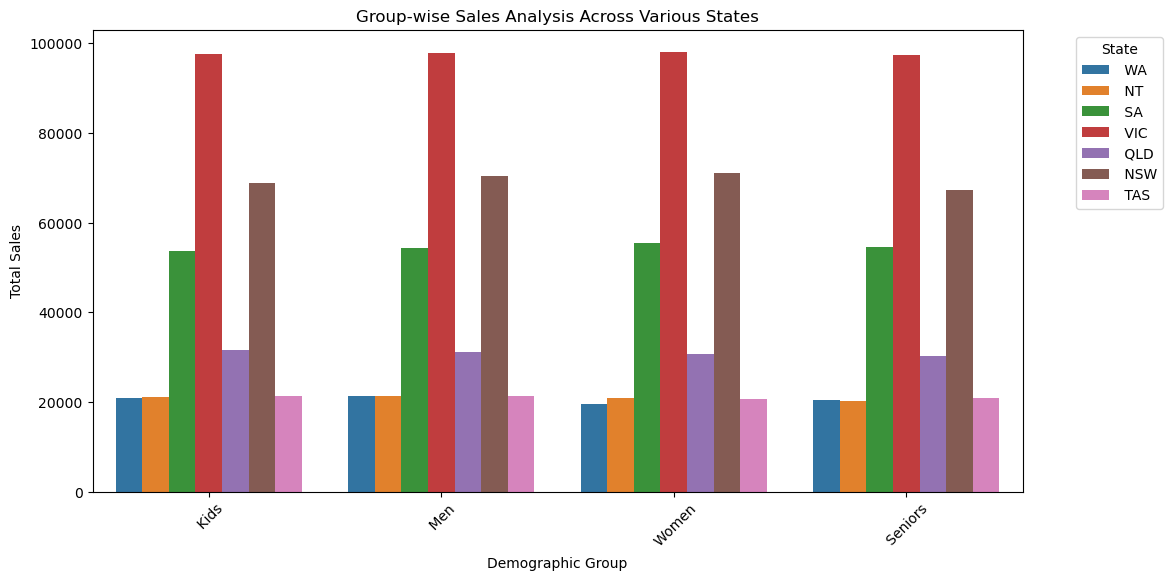

In [117]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Group", y="Sales", hue="State", ci=None)
plt.xticks(rotation=45)
plt.title("Group-wise Sales Analysis Across Various States")
plt.xlabel("Demographic Group")
plt.ylabel("Total Sales")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

/var/folders/8g/42j1t13n79s9kywxmbgrdt3r0000gn/T/ipykernel_2187/2123350160.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df, x="Group", y="Sales", hue="State", kind="bar", height=6, aspect=2, ci=None)


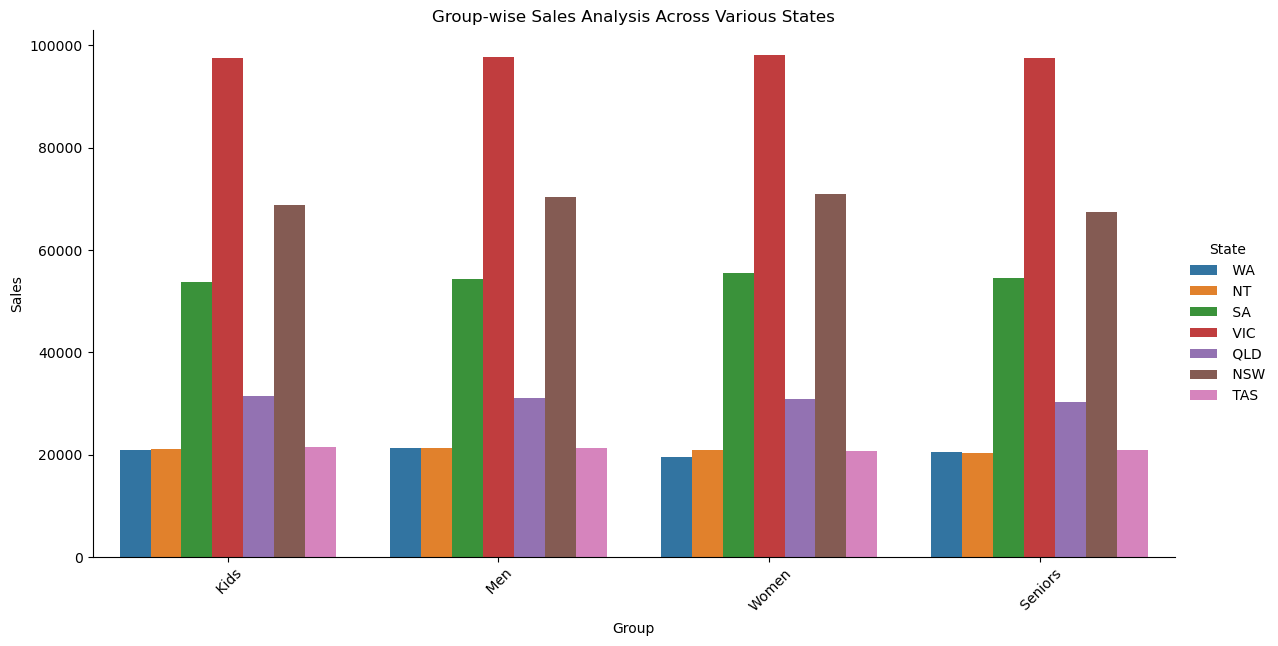

In [119]:
sns.catplot(data=df, x="Group", y="Sales", hue="State", kind="bar", height=6, aspect=2, ci=None)
plt.xticks(rotation=45)
plt.title("Group-wise Sales Analysis Across Various States")
plt.show()

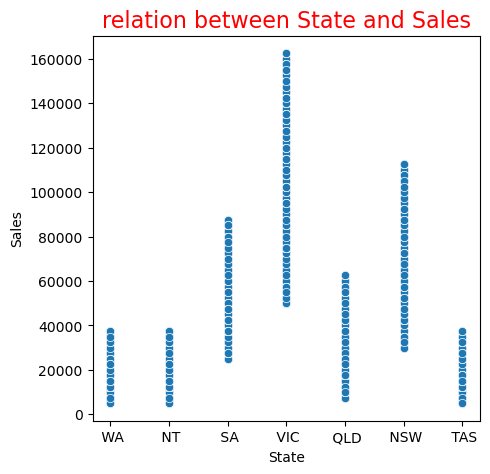

In [37]:
plt.figure(figsize = (5 ,5))
sns.scatterplot(data = df , x = 'State', y = 'Sales')
plt.title('relation between State and Sales' , color = 'red' , fontsize = 16)
plt.show()

In [27]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


<Axes: xlabel='Group', ylabel='Sales'>

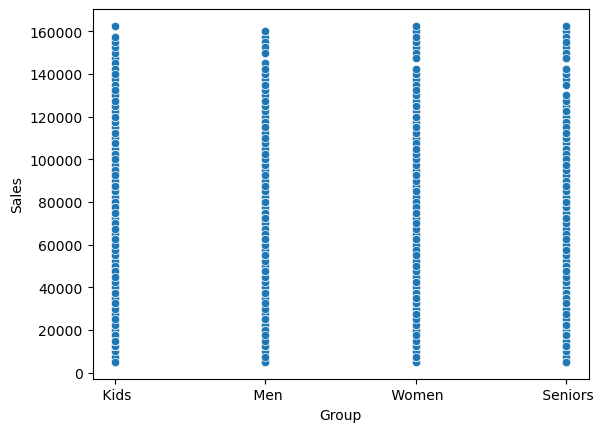

In [39]:
sns.scatterplot(data  = df , x ='Group' , y = 'Sales')